In [15]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime

import copy as cp

DATA_PATH = "./HW/FinancialMath/data/"

#  <span style="font-family: Palatino; font-size: 30px; color:purple">Getting comfortable with some financial math (5.5 pts)</span>

In this home work, you will get some experience working with some common financial mathematics and then have a chance to see if you can use this to do some financial data mining.

(Note that for purposes of this home work, we are making some simplifying assumptions about the data (e.g., that we can ignore weekends and holidays; that we don't need write extra code to make our functions fail gracefully, such as code  to check to see if a date is out of range; etc.)

## <span style="font-family: Palatino; font-size: 24px; color:purple">Return math (2.5 pts) </span>

### Calculate returns and log returns for the following price series.  Compare the two.  What do you notice? (0.5 pt)

| DOW  | Closing Price |
|------|--------------:|
| Mon  | \$1.00        |
| Tue  | \$1.50        |
| Wed  | \$1.00        |
| Thr  | \$0.50        |

**Read in the file `HW01_SPX.csv`.**

In [16]:
df=pd.read_csv('/content/HW01_SPX - Copy.csv')

### Calculate returns and log returns for the closing price and plot the distribution of the log returns. What do you notice?  (Hint: Use a large bin number like 41 or 51.)  Add two new columns to your S&P data frame: `ret` and  `log_ret`. (0.5 pts)

In [17]:
returns = df['Close'].pct_change()
df['ret'] = returns

log_returns = np.log(df['Close']) - np.log(df['Close'].shift(1))
df['log_ret'] = log_returns

df.head()

,Date,Open,High,Low,Close,ret,log_ret
0,2000-01-03,1455.22,1478.00,1438.36,1455.22,NaN,NaN
1,2000-01-04,1399.42,1455.22,1397.43,1399.42,-0.038345,-0.039099
2,2000-01-05,1402.11,1413.27,1377.68,1402.11,0.001922,0.001920
3,2000-01-06,1403.45,1411.90,1392.02,1403.45,0.000956,0.000955
4,2000-01-07,1441.47,1441.47,1400.53,1441.47,0.027090,0.026730


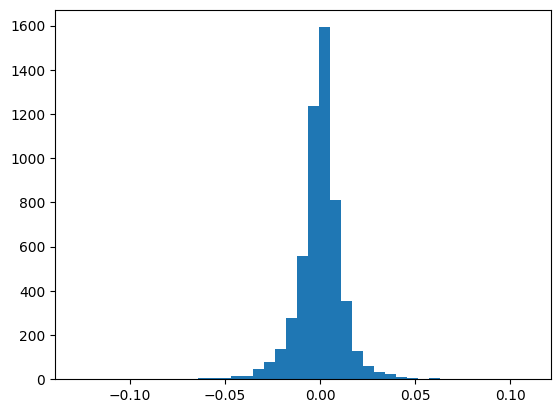

In [18]:
plt.hist(df['log_ret'], bins=41)
plt.show()

## **Observation: The histogram shows that the log returns is distributed across 0, which tells us that it is normally distributed.**

### Plot the returns against the log returns using the same axis limits on the x and y axes.  Write down your observations. (0.5 pts)

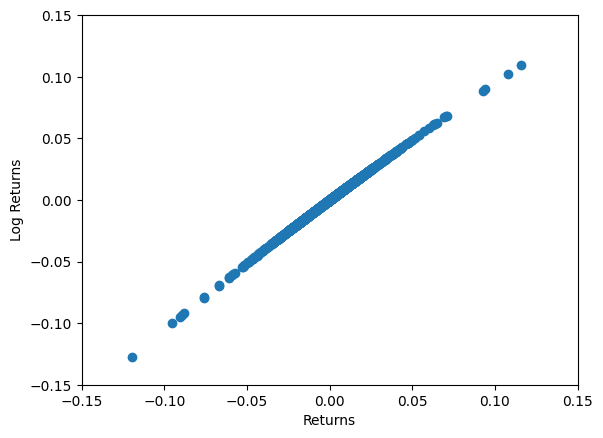

In [19]:
plt.scatter(df['ret'], df['log_ret'])
plt.xlabel('Returns')
plt.ylabel('Log Returns')
plt.xlim([-0.15, 0.15])
plt.ylim([-0.15, 0.15])
plt.show()

## **Observation**: Here we can see as the return value is increasing, the log return value is also increasing from which we can figure out that they have linear relationship

### Calculate the annualized volatility of the equity series over the most recent 30, 90, 120 and 360 days.  For now, you may assume that calendar days are equivalent to trading days (i.e., that there are no days on which trading is not done, and that the last $x$ observations in the data frame represent the last $x$ days) and that there are 252 trading days in a year.  Has the market become more or less volatile in the past 120 days? (0.5 pt)

In [20]:
recent_returns = df['log_ret'][-30:]
annualized_volatility_30 = recent_returns.std() * np.sqrt(252)

recent_returns = df['log_ret'][-90:]
annualized_volatility_90 = recent_returns.std() * np.sqrt(252)

recent_returns = df['log_ret'][-120:]
annualized_volatility_120 = recent_returns.std() * np.sqrt(252)

recent_returns = df['log_ret'][-360:]
annualized_volatility_360 = recent_returns.std() * np.sqrt(252)

print("Annualized Volatility (30 days):", annualized_volatility_30)
print("Annualized Volatility (90 days):", annualized_volatility_90)
print("Annualized Volatility (120 days):", annualized_volatility_120)
print("Annualized Volatility (360 days):", annualized_volatility_360)

Annualized Volatility (30 days): 0.09080449124988775
Annualized Volatility (90 days): 0.11027584870623995
Annualized Volatility (120 days): 0.13457909207143662
Annualized Volatility (360 days): 0.30000616029149474


## **Observation: The market has become less volatile in past 120 days as compared to past 360 days. The market was more volatile before 120 days as compared to 30 or 90 days**


### Repeat this again, but this time for the (end) date 2021-06-21. (0.5 pts)

In [21]:
t_d = pd.to_datetime('2021-06-21')
df['Date'] = pd.to_datetime(df['Date'])
t_index = df[df['Date'] == t_d].index[0]

recent_returns = df['log_ret'][t_index - 30 : t_index + 1]
annualized_volatility_30 = recent_returns.std() * np.sqrt(252)

recent_returns = df['log_ret'][t_index - 90: t_index + 1]
annualized_volatility_90 = recent_returns.std() * np.sqrt(252)

recent_returns = df['log_ret'][t_index - 120: t_index + 1]
annualized_volatility_120 = recent_returns.std() * np.sqrt(252)

recent_returns = df['log_ret'][t_index - 360 : t_index + 1]
annualized_volatility_360 = recent_returns.std() * np.sqrt(252)

print("Annualized Volatility (30 days) for 2021-06-21:", annualized_volatility_30)
print("Annualized Volatility (90 days) for 2021-06-21:", annualized_volatility_90)
print("Annualized Volatility (120 days) for 2021-06-21:", annualized_volatility_120)
print("Annualized Volatility (360 days) for 2021-06-21:", annualized_volatility_360)


Annualized Volatility (30 days) for 2021-06-21: 0.12659906036545418
Annualized Volatility (90 days) for 2021-06-21: 0.1332556049975899
Annualized Volatility (120 days) for 2021-06-21: 0.13837143777591662
Annualized Volatility (360 days) for 2021-06-21: 0.30062334516762884


## <span style="font-family: Palatino; font-size: 24px; color:purple"> Valuing options (3 pts)</span>

Recall that we may calculate the value of a European put, $P(\cdot)$, under the Black-Scholes-Merton pricing framework as:

\begin{equation}
	P= \ N(- d_2)K e^{-rt}  - N(-d_1) S ,~\text{where}
\end{equation}

\begin{equation}
	d_1= \frac{1}{\sigma \sqrt{t}} \left[\ln{\left(\frac{S}{K}\right)} + \left(r + \frac{\sigma^2}{2} \right)t \right],
\end{equation}

\begin{equation}
	d_2 = \frac{1}{\sigma \sqrt{t}} \left[\ln{\left(\frac{S}{K}\right)} + \left(r - \frac{\sigma^2}{2} \right)t \right]\\
    = d_1 - \sigma \sqrt{t}, ~~ \text{and}
\end{equation}

<!-- \begin{eqnarray*}
	d_2 &=& \frac{1}{\sigma \sqrt{t}} \left[\ln{\left(\frac{S}{K}\right)} + \left(r - \frac{\sigma^2}{2} \right)t \right]\\
    &=& d_1 - \sigma \sqrt{t}, ~~ \text{and}
\end{eqnarray*} -->

\begin{equation}
	N(x)=\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{1}{2}z^2} dz~ ;
\end{equation}


and where:

\begin{aligned}
	t		& \equiv \text{the time (in years) between today and the expiration of the option, i.e., $T-t_0$, where, $T$ is the closing date;}\\
	S   	& \equiv  \text{the price of the stock today;}\\
	K		& \equiv \text{the price at which the option holder may sell the stock at time $t$;}\\
	\sigma	& \equiv \text{the price volatility;}\\
	r		& \equiv \text{the risk free rate (e.g., on U.S. government securites with a maturity date of today+$t$});\\
	N(x)	& \equiv \text{the standard normal cdf evaluated at $x$}; \text{ and}\\
	 P      &    =    P(S,K,\sigma,r, t) \equiv \text{the value of a European put option allowing the holder to sell one share of the underlying stock $S$ today at price $K$ at time $t$, given an annualized volatility of $\sigma$ and a risk-free rate $r$ }.
\end{aligned}

Note that $N(x)$ is the standard normal CDF (i.e., mean $\mu = 0$  and variance $\sigma^2 = 1$), which we can approximate numerically using the `scipy.stats` function `norm.cdf(x, 0, 1)`.

### Write a python function $\small \texttt{EuroPut(S,K, sigma, r, t)}$ to price a European put option. (0.5 pts)

In [22]:
def EuroPut(S, K, sigma, r, t):
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
  d2 = d1 - sigma * np.sqrt(t)

  P = (stats.norm.cdf(-d2) * K * np.exp(-r * t)) - (stats.norm.cdf(-d1) * S)

  return P


### Use the  $\small \texttt{EuroPut(.)}$ function you wrote to price an option on a stock with the following characteristics: (0.5 pts)




|                        |           |
|------------------------|-----------|
|price today             | \$20.00   |
|exercise price          | \$35.00   |
|time to expiration (yrs)|    1.00   |
|volatility              |    0.25   |
|risk-free rate          |    0.05   |


In [23]:
EuroPut(20, 35, 0.25, 0.05, 1)

13.342106213937623

### Plot (1 pt) <br>
<b>(a) the price of the put option for volatility values of `[0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.4]`; and <br>
(b) price the put option for time to expiration values of `[0.25, 0.50, 0.75, 1.0, 1.25, 1.5, 2.0]`.</b>

_(Two separate plots)_

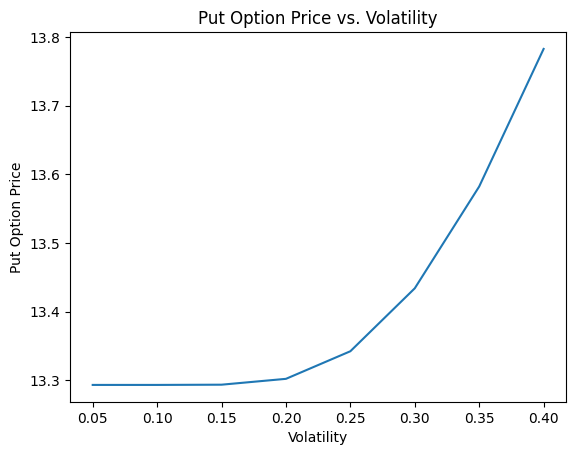

In [24]:
vol= [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.4]
put_price = []

for v in vol:
  x = EuroPut(20, 35, v, 0.05, 1)
  put_price.append(x)

plt.plot(vol, put_price)
plt.xlabel('Volatility')
plt.ylabel('Put Option Price')
plt.title('Put Option Price vs. Volatility')
plt.show()


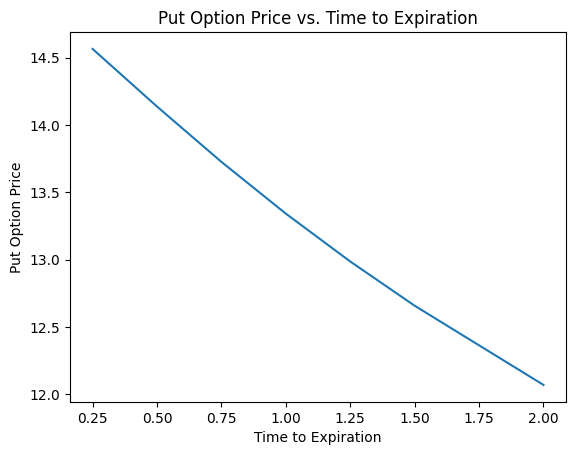

In [25]:
time= [0.25, 0.50, 0.75, 1.0, 1.25, 1.5, 2.0]
t=[]

for x in time:
  y = EuroPut(20, 35, 0.25, 0.05, x)
  t.append(y)

plt.plot(time, t)
plt.xlabel('Time to Expiration')
plt.ylabel('Put Option Price')
plt.title('Put Option Price vs. Time to Expiration')
plt.show()

### Imagine that the actual closing price of the option today is $\$14.25$.  What value of volatility is implied given the price in the marketplace? (Hint, use your  $\small \texttt{EuroPut(.)}$ function to search for a value of  $\small \texttt{sigma}$ that makes the price equal to $\$14.25 \pm \$0.005$ or less by trying different values of  $\small \texttt{sigma}~$.) (1 pt)

In [26]:
target_price = 14.25
tolerance = 0.005

sigma = 0.0
step = 0.01
while True:
    price = EuroPut(20, 35, sigma, 0.05, 1)
    if abs(price - target_price) <= tolerance:
        print(f"Implied volatility: {sigma:.4f}")
        break
    elif price < target_price:
        sigma += step
    else:
        sigma -= step


Implied volatility: 0.4900


<ipython-input-22-45c80f8ea354>:2: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))


# <span style="font-family: Palatino; font-size: 30px; color:purple"> How well does Black-Scholes predict? (2.5 pts)</span>

**Read in the file `SPX_put_X20210716_new.csv`** which contains several months of history for an option on the S&P500 index.  

The terms of the option are:

|                        |           |
|------------------------|-----------|
|current_price           | in `underlying_last`|
|strike price            | \$3685    |
|expiration date         | 2021-07-16|
|risk-free rate          |  0.0025 * |

\* the risk-free rate varies daily, but for convenience in this example we have set it to a constant value.

This file has the following record structure:

|col	|	variable	|	defn	|
|-------------:		|-------------:		|------------------------------------:	|
1	|	`record_id`	|		|
2	|	`quote_unixtime`	|	unix time quote finalized	|
3	|	`quote_readtime`	|	date and time quote finalized	|
4	|	`quote_date`	|	date quote finalized	|
5	|	`quote_time_hours`	|	time of day quote finalized	|
6	|	`underlying_last`	|	the last observed price of the underlying	|
7	|	`expire_date`	|	option expiration date	|
8	|	`expire_unix`	|	option expiration unix date	|
9	|	`strike`	|	option strike price ($K$)	|
10	|	`p_bid`	|	last observed bid	|
11	|	`p_ask`	|	last observed ask	|
12	|	`p_size`	|	last offered quantity bid x ask quantity	|
13	|	`p_last`	|	last traded price (NOT price at close!)	|
14	|	`p_volume`	|	volume of trades	|
15	|	`strike_distance`	|	underlying price -  strike price ($S_t - K$)	|
16	|	`strike_distance_pct`	|	col 15 as pct of underlying price ($\frac{S_t - K}{S_t}$)	|

In [27]:
df1=pd.read_csv('/content/SPX_put_X20210716_new - Copy (1).csv')

### Use your  $\small \texttt{EuroPut(.)}$ function to price the option as of the first date in our data set (2021-06-21).  Use volatilities you calculated from that date back 30 days and 120 days. (0.5 pts)

In [28]:
df1['quote_date'] = pd.to_datetime(df1['quote_date'])
first_date = df1['quote_date'].min()
print(first_date)


first_date_index = df1[df1['quote_date'] == first_date].index[0]

underlying_price = df1.loc[first_date_index, 'underlying_last']
strike_price = df1.loc[first_date_index, 'strike']
expiration_date = pd.to_datetime(df1.loc[first_date_index, 'expire_date'])

print(underlying_price)
print(strike_price)
print(expiration_date)

time_to_expiration = (expiration_date - first_date).days / 365

risk_free_rate = 0.0025

volatility_30 = annualized_volatility_30
volatility_120 = annualized_volatility_120

option_price_30 = EuroPut(underlying_price, strike_price, volatility_30, risk_free_rate, time_to_expiration)
option_price_120 = EuroPut(underlying_price, strike_price, volatility_120, risk_free_rate, time_to_expiration)

print(f"Option price using 30-day volatility: {option_price_30}")
print(f"Option price using 120-day volatility: {option_price_120}")


2021-06-21 00:00:00
4224.66
3685
2021-07-16 00:00:00
Option price using 30-day volatility: 0.0005206391941745686
Option price using 120-day volatility: 0.0026618991984581064


### Now write a short function to calculate the implied volatility for all of the options prices in the data  (you may assume that the data conventions are the same in both the SPX and SPX put option files)  (1 pt):

In [29]:
def implied_volatility(row):
    underlying_price = row['underlying_last']
    strike_price = row['strike']
    option_price = row['p_last']
    expiration_date = pd.to_datetime(row['expire_date'])
    quote_date = pd.to_datetime(row['quote_date'])

    time_to_expiration = (expiration_date - quote_date).days / 365
    risk_free_rate = 0.0025

    sigma = 0.2
    tolerance = 0.001
    max_iterations = 100

    for i in range(max_iterations):
        option_price_calculated = EuroPut(underlying_price, strike_price, sigma, risk_free_rate, time_to_expiration)
        if abs(option_price_calculated - option_price) < tolerance:
            return sigma
        elif option_price_calculated < option_price:
            sigma += 0.01
        else:
            sigma -= 0.01

    return None

df1['implied_vol'] = df1.apply(implied_volatility, axis=1)


### Next calculate the _ratio_ of the implied volatility to the realized volatility at 120 days for all option prices in the options data and plot the distribution (don't worry about error trapping, etc.). (1 pt)


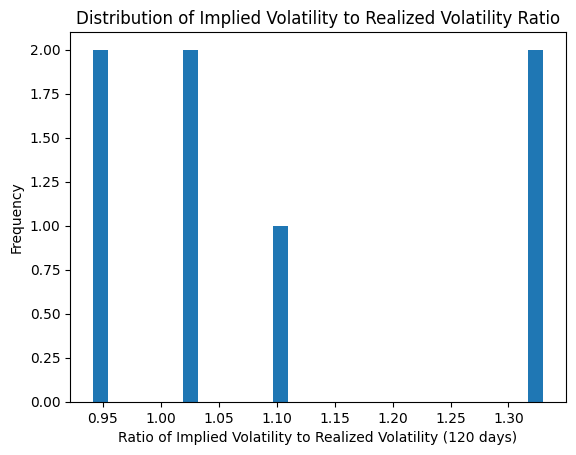

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def calculate_realized_volatility(row, df, window=120):
    quote_date = pd.to_datetime(row['quote_date'])
    end_date = quote_date
    start_date = end_date - pd.Timedelta(days=window)

    filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    if not filtered_df.empty:
        return filtered_df['log_ret'].std() * np.sqrt(252)
    else:
        return None


df1['realized_vol_120'] = df1.apply(lambda row: calculate_realized_volatility(row, df), axis=1)

df1['iv_ratio_rv'] = df1['implied_vol'] / df1['realized_vol_120']

plt.hist(df1['iv_ratio_rv'].dropna(), bins=30)
plt.xlabel('Ratio of Implied Volatility to Realized Volatility (120 days)')
plt.ylabel('Frequency')
plt.title('Distribution of Implied Volatility to Realized Volatility Ratio')
plt.show()


# <span style="font-family: Palatino; font-size: 30px; color:purple"> Some data financial data mining (2 pts)</span>


## Now create a new data set for modeling (with lagged features) (1.5 pts)

1. Next create a new variable, `p_last_t1` that contains all of the values of `p_last` shifted forward one day so that the vaues of $x_{t-1}$ of the independent variables are associated (in the same row as) the values of $y_t$ (the dependent variable).  Said differently, set the data up so that we use the values if the independent variables that we know before the Open today (i.e., yesterdays values of the independent variables at the Close) to predict the direction of the return at the end of the day today.
2. Example: The row of the final data set for the date 2021-06-28, would contain all of the data for 2021-06-28 (except that day's value of `p_last`), and also and _tomorrow's_ (2021-06-29) value of `p_last` which would be stored in the variable `p_last_t1` in the row for 2021-06-28.

In [31]:
df1['p_last_t1'] = df1['p_last'].shift(-1)
df1.head(20)

,Unnamed: 0,quote_unixtime,quote_readtime,quote_date,quote_time_hours,underlying_last,expire_date,expire_unix,strike,p_bid,p_ask,p_size,p_last,p_volume,strike_distance,strike_distance_pct,implied_vol,realized_vol_120,iv_ratio_rv,p_last_t1
0,108508,1624305600,2021-06-21 16:00,2021-06-21,16,4224.66,2021-07-16,1626465600,3685,5.09,5.30,923 x 811,0.00,,539.7,0.128,0.13,0.138147,0.941027,0.00
1,116717,1624392000,2021-06-22 16:00,2021-06-22,16,4246.38,2021-07-16,1626465600,3685,3.90,4.09,1389 x 100,0.00,,561.4,0.132,0.13,0.137511,0.945382,0.00
2,125088,1624478400,2021-06-23 16:00,2021-06-23,16,4241.83,2021-07-16,1626465600,3685,3.40,3.61,886 x 1621,0.00,,556.8,0.131,0.14,0.136715,1.024027,0.00
3,133233,1624564800,2021-06-24 16:00,2021-06-24,16,4266.39,2021-07-16,1626465600,3685,2.85,3.00,106 x 1310,0.00,,581.4,0.136,0.14,0.136958,1.022213,0.00
4,141537,1624651200,2021-06-25 16:00,2021-06-25,16,4280.68,2021-07-16,1626465600,3685,2.21,2.35,109 x 401,0.00,,595.7,0.139,0.15,0.135865,1.104037,0.00
5,149931,1624910400,2021-06-28 16:00,2021-06-28,16,4290.52,2021-07-16,1626465600,3685,1.74,1.84,110 x 436,0.00,,605.5,0.141,0.17,0.128549,1.322453,0.00
6,158423,1624996800,2021-06-29 16:00,2021-06-29,16,4291.91,2021-07-16,1626465600,3685,1.71,1.85,733 x 1789,0.00,,606.9,0.141,0.17,0.127796,1.330241,1.30
7,166926,1625083200,2021-06-30 16:00,2021-06-30,16,4297.32,2021-07-16,1626465600,3685,1.25,1.55,751 x 404,1.30,750,612.3,0.142,NaN,0.121850,NaN,1.30
8,1641,1625169600,2021-07-01 16:00,2021-07-01,16,4320.20,2021-07-16,1626465600,3685,0.85,1.05,100 x 710,1.30,0,635.2,0.147,NaN,0.120972,NaN,1.30
9,10010,1625256000,2021-07-02 16:00,2021-07-02,16,4352.48,2021-07-16,1626465600,3685,0.60,0.75,1819 x 921,1.30,750,667.5,0.153,NaN,0.118776,NaN,1.30


## Use your new data set:  Build a (small!) decision tree classifier to predict whether the options price will rise or fall tomorrow, using any of the variables you like. (0.5 pts)
You may also include the current value of estimated volatility, if you would like.  Please show your results and discuss (1-2 paragraphs) your impressions.  Does the implied volatility provide any useful power?

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df1['price_change'] = (df1['p_last'].shift(-1) > df1['p_last']).astype(int)

print(df1['price_change'])

features = ['underlying_last', 'implied_vol', 'realized_vol_120']
data = df1.dropna(subset=features + ['price_change'])


X = df1[features]
y = df1['price_change']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
Name: price_change, dtype: int64
Accuracy: 0.83


## **Observation: When I attempted to modify the features for prediction by removing implied volatility, the accuracy of the model remained unchanged. This suggests that implied volatility may not significantly impact this dataset. The dataset is relatively small, with only one instance where the price increases, while in the other 17 entries, the price either decreases or remains constant. As a result, the dataset is highly imblalanced, which likely limits the contribution of implied volatility to the predictive power of the model.**

# Extra Credit* (not required)

## Flexing with a larger data set

If you are feeling ambitious, or you are just intrigued by this problem, you can load the data set: `HW01_SPX_2021_eod.txt` (tab delimited) which contains just under 1MM records, in the same format as the data you have been using (but there is now an extra column `p_iv` which contains the pre-computed implied volatility. In this case, I have only included records for which there was actually volume traded in the option on the date indicated.  (Why might this be a bad idea if we were trying to do this for real??)  Can you do better than Black-Scholes?  How would you test your model?